In [94]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/restaurants_train.csv
data/.DS_Store
data/restaurants_test.csv


In [93]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train = pd.read_csv('data/restaurants_train.csv')
test = pd.read_csv('data/restaurants_test.csv')

In [14]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [15]:
train

Id  Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0 1999-07-17    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1 2008-02-14      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2 2013-03-09  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3 2012-02-02       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4 2009-05-09   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...        ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132 2008-06-25     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133 2006-10-12       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134 2006-07-08     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135 2010-10-29    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136 2009-09-01    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    3.0    5    3    4    5    5    4    3    4  5653753.0  
1    3.0    0    0    0    0    0    0    0    0  6923131.0  
2    3.0    0    0    0    0    0    0    0    0  2055379.0  
3    7.5   25   12   10    6   18   12   12    6  2675511.0  
4    3.0    5    1    3    2    3    4    3    3  4316715.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...  
132  3.0    0    0    0    0    0    0    0    0  5787594.0  
133  3.0    0    0    0    0    0    0    0    0  9262754.0  
134  3.0    0    0    0    0    0    0    0    0  2544857.0  
135  3.0    0    0    0    0    0    0    0    0  7217634.0  
136  3.0    0    0    0    0    0    0    0    0  6363241.0  

[137 rows x 43 columns]

In [16]:
numerical_features = train.select_dtypes([np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

## Analyzing Numerical Variables

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


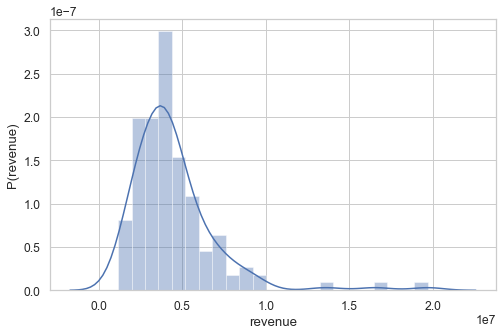

In [18]:
print(train['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1,
        rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

In [19]:
train[train['revenue'] > 10000000]

Id  Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  P29  \
16  16 2000-01-07  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...  2.0   
75  75 2005-10-15  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...  0.0   
99  99 1999-12-18  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...  1.0   

    P30  P31  P32  P33  P34  P35  P36  P37     revenue  
16    0    0    0    0    0    0    0    0  19696939.0  
75    0    0    0    0    0    0    0    0  16549064.0  
99    5    5    4    2    5    5    5    3  13575224.0  

[3 rows x 43 columns]

In [20]:
train = train[train['revenue'] < 10000000]
train.reset_index(drop=True).head()

Id  Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0 1999-07-17    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1 2008-02-14      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2 2013-03-09  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3 2012-02-02       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4 2009-05-09   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

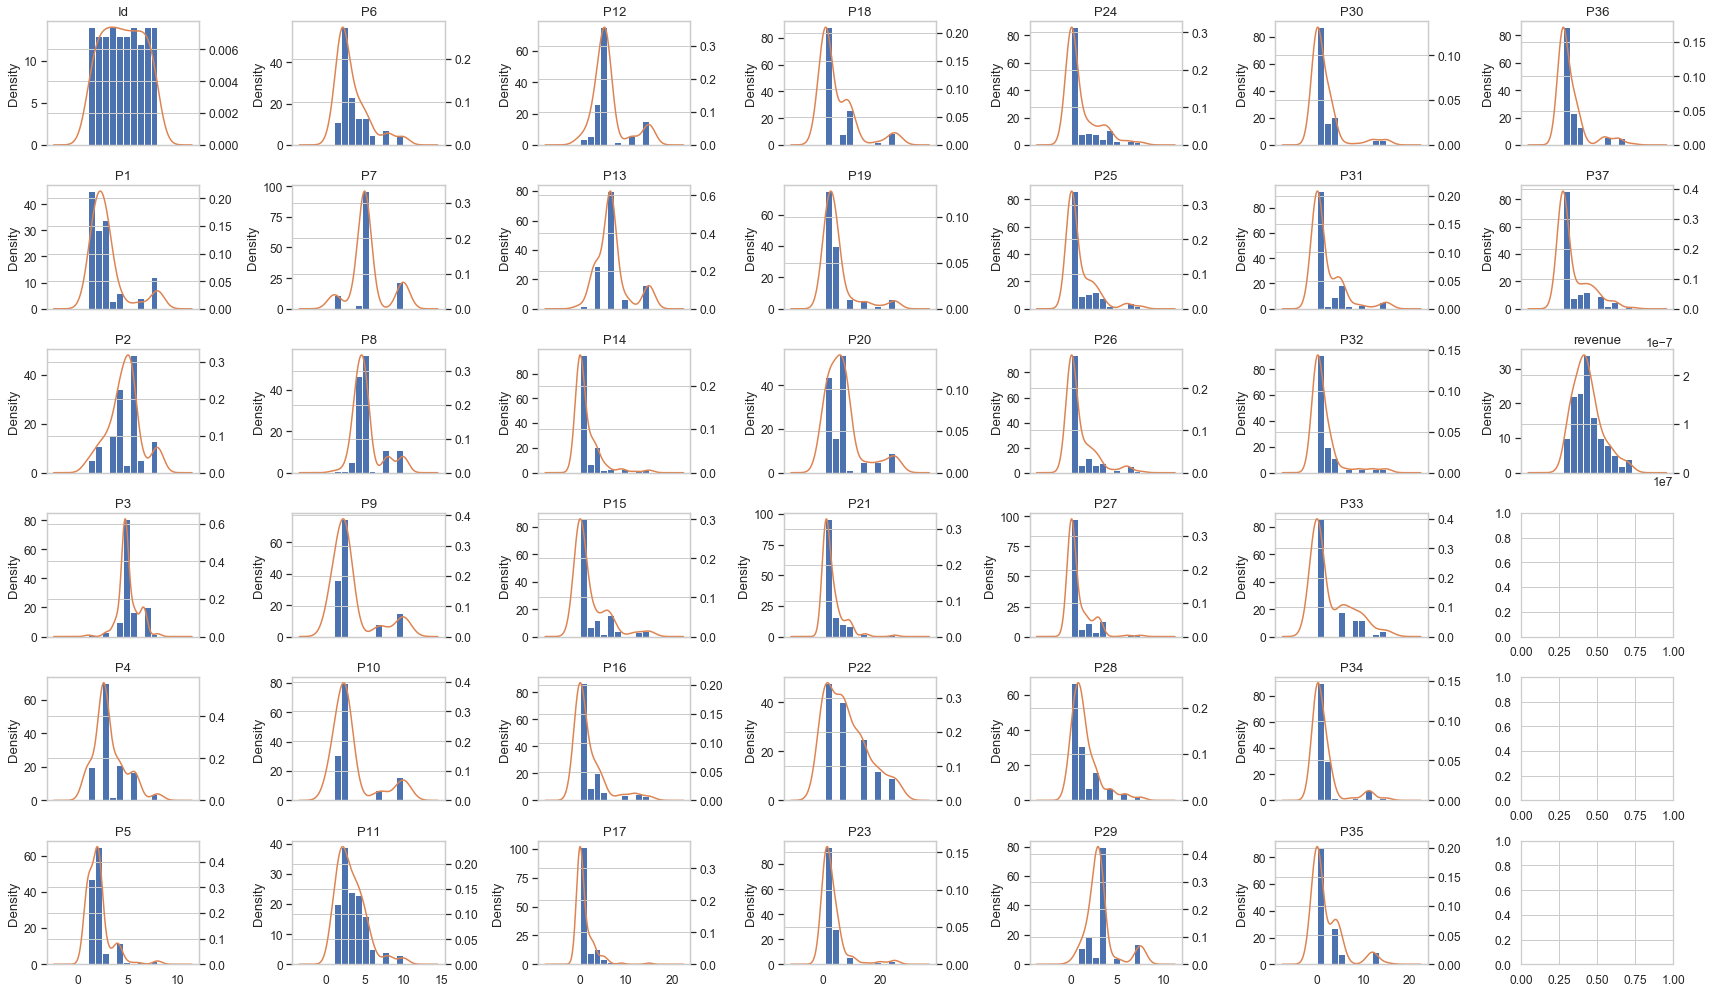

In [21]:
k = len(train[numerical_features].columns)
n = 6
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig, axes = plt.subplots(n, m, figsize=(n * 4, m * 2))
for i, (name, col) in enumerate(train[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[c, r]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

## Analyzing Categorial Variables

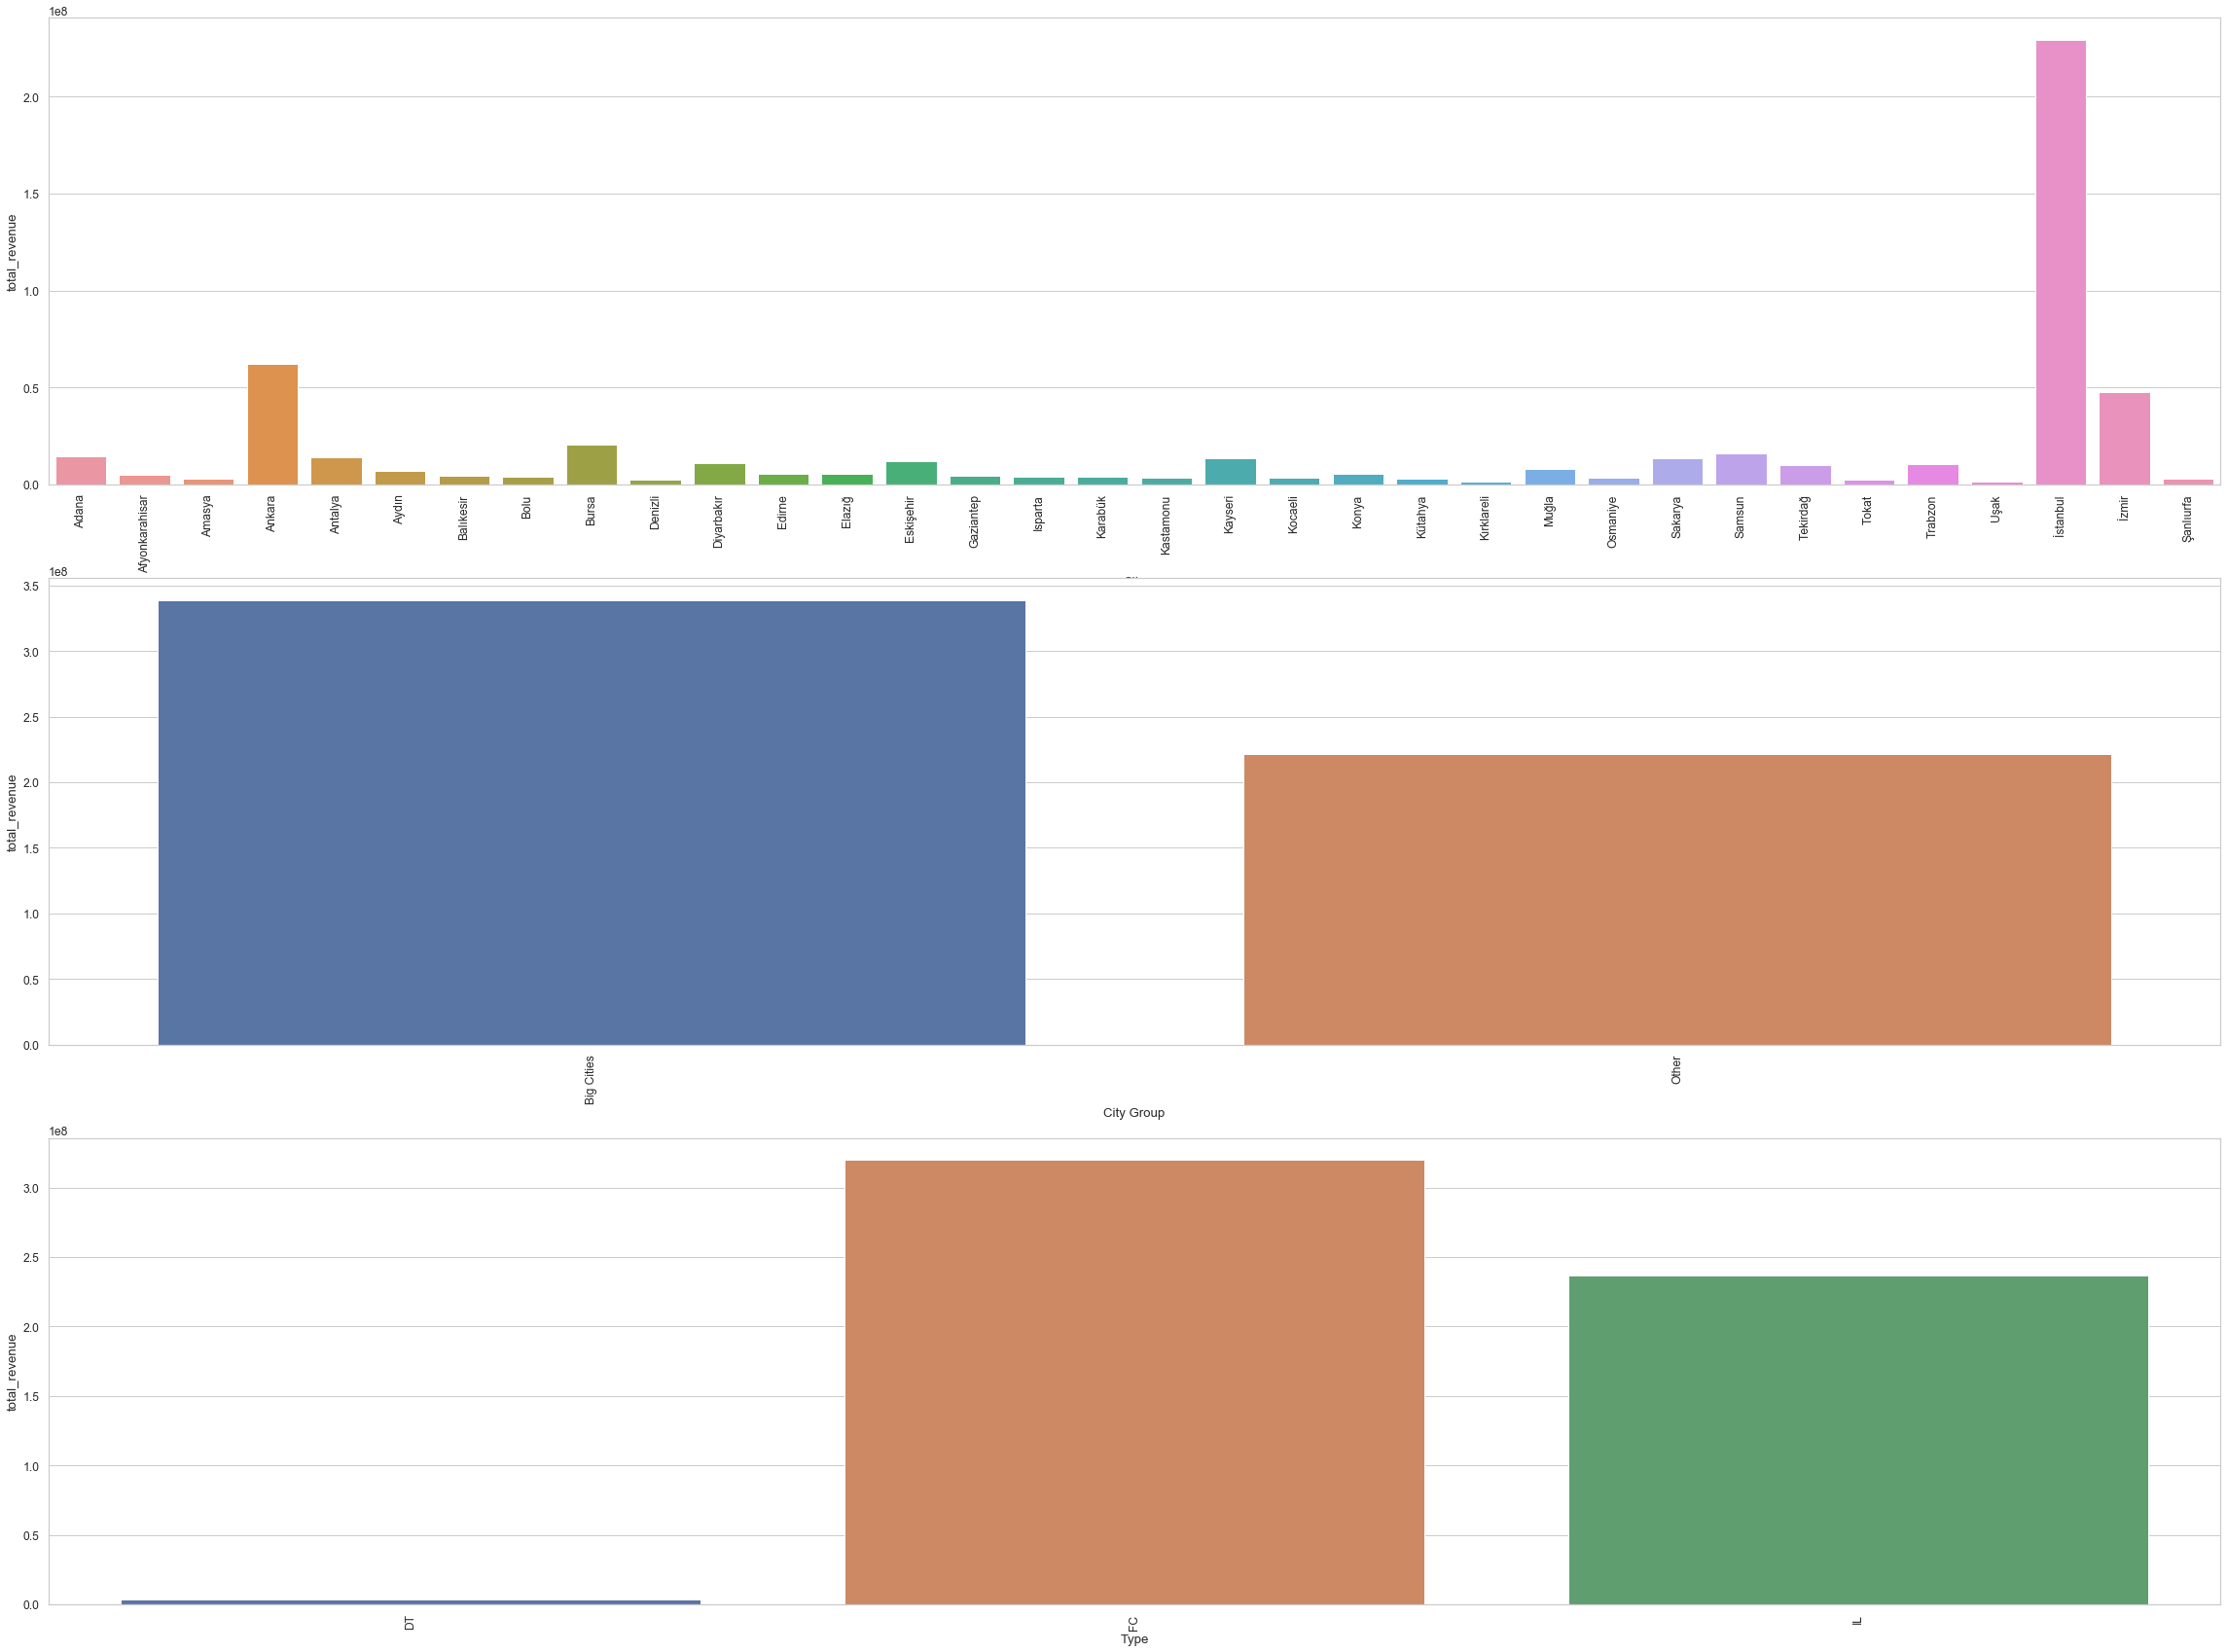

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum() \
        .reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Analyzing Relationships Between Numerical Variables and the target ['revneue']

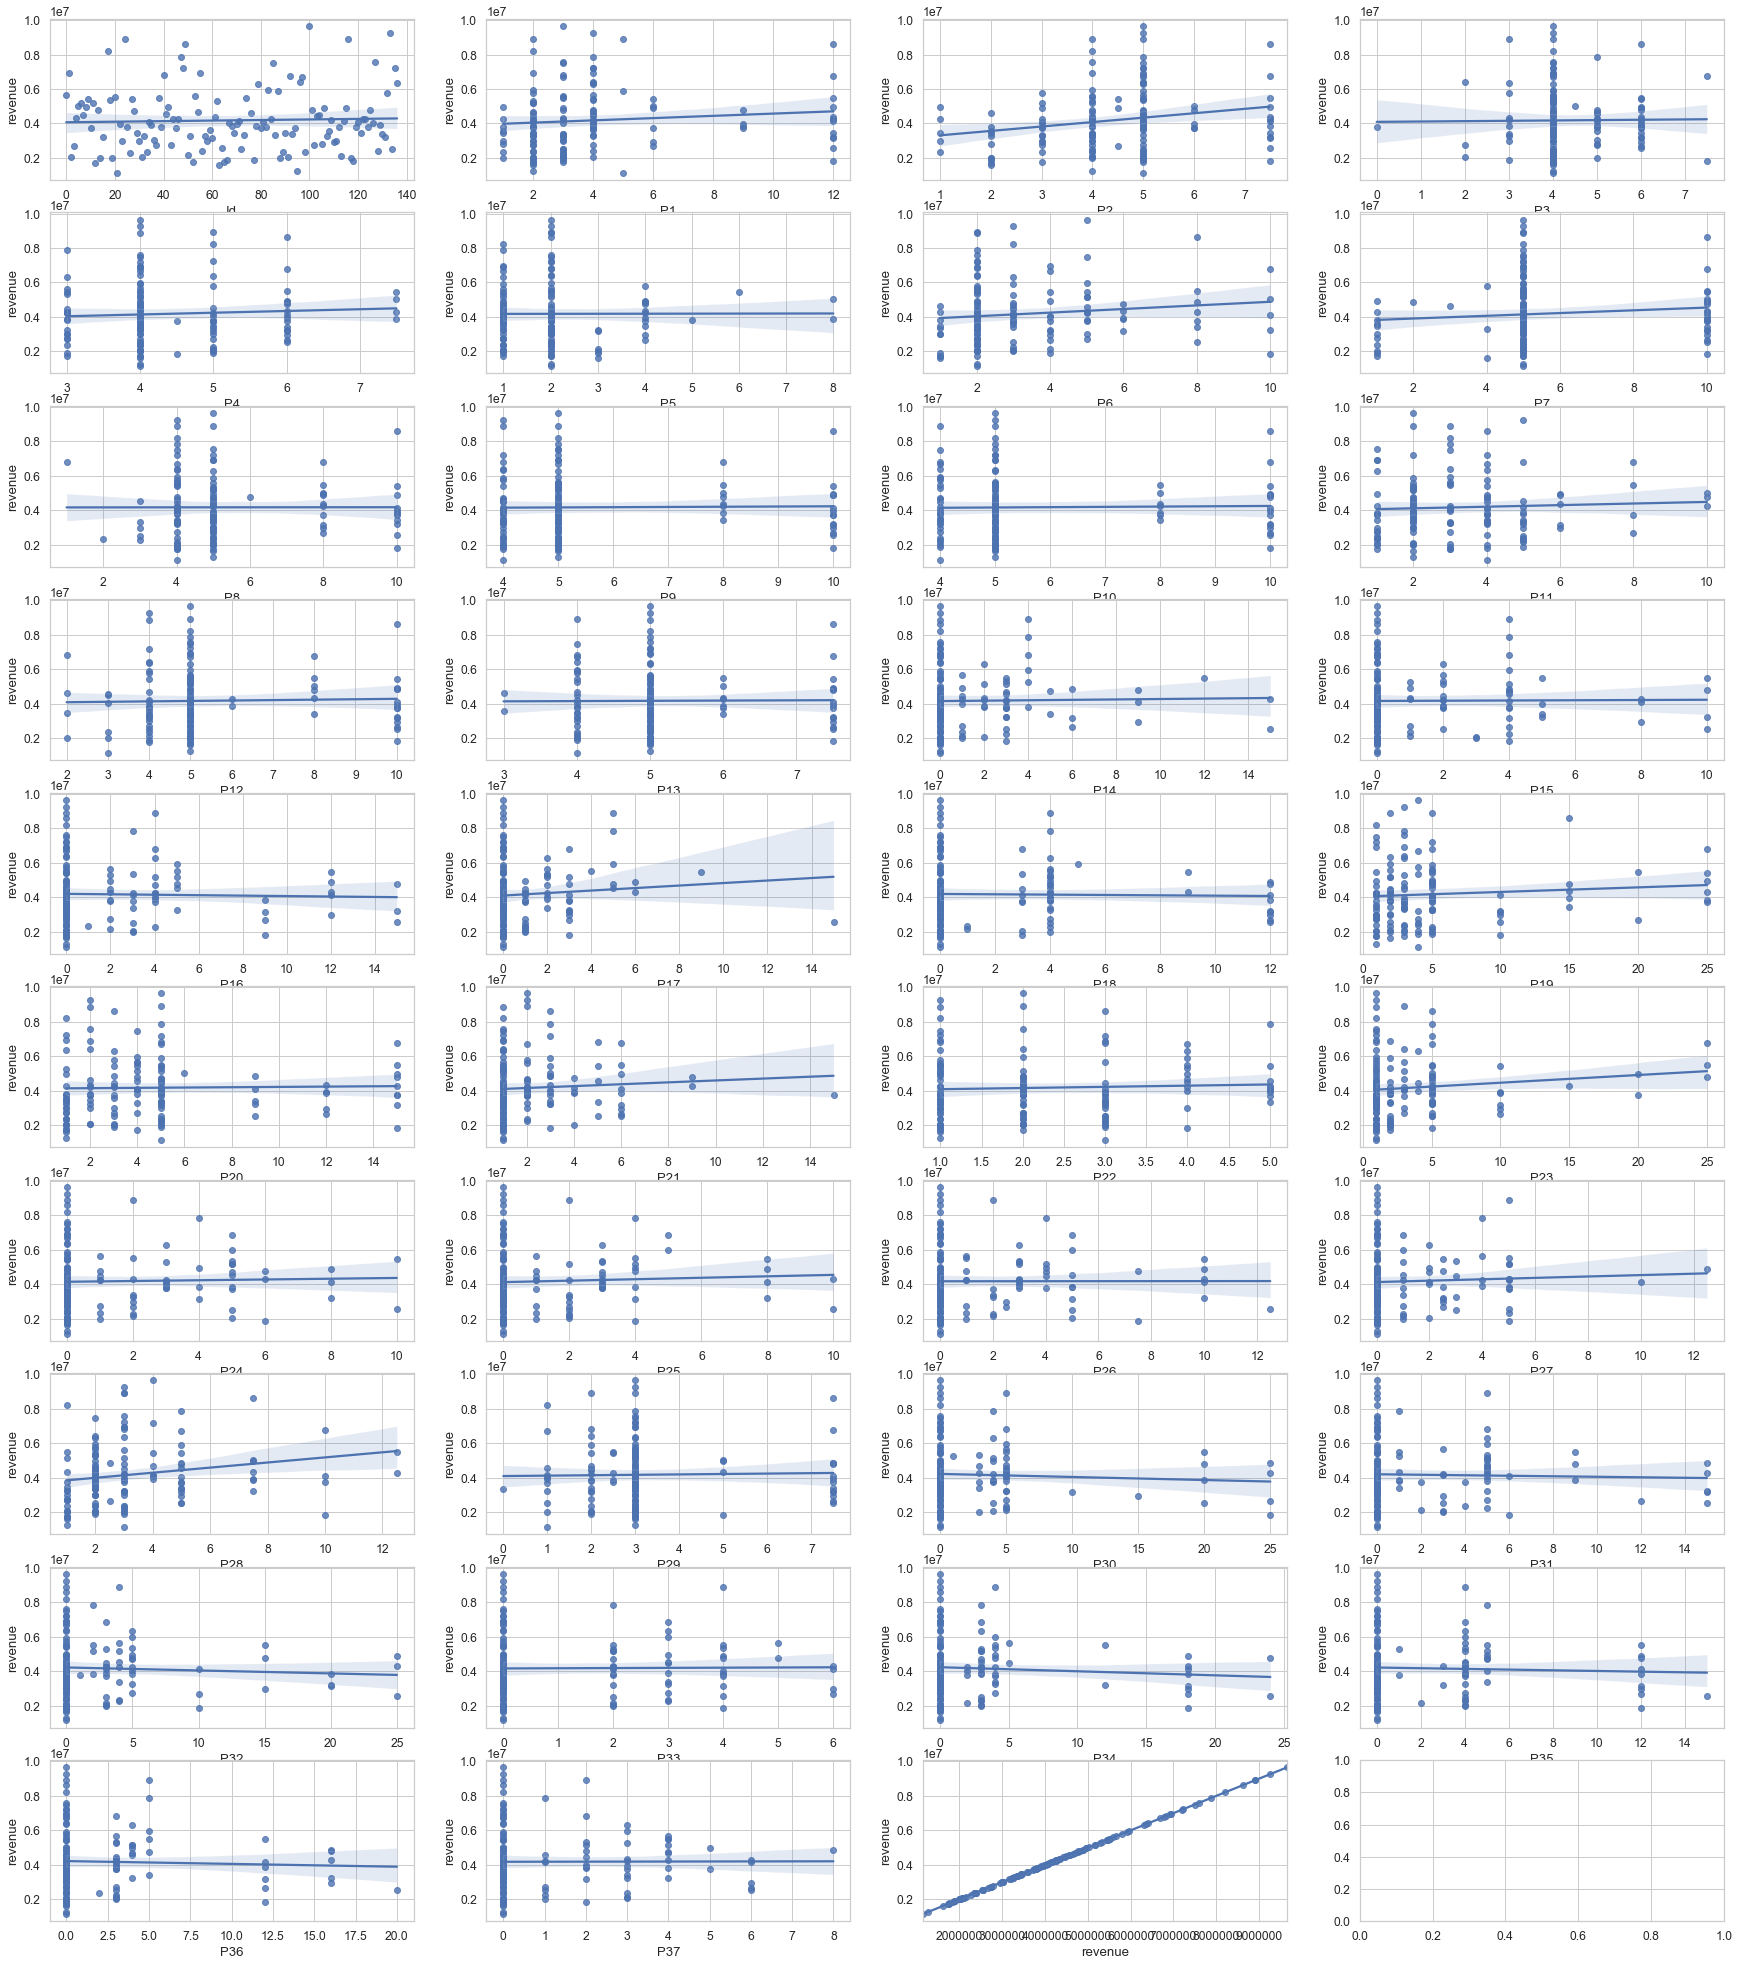

In [23]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

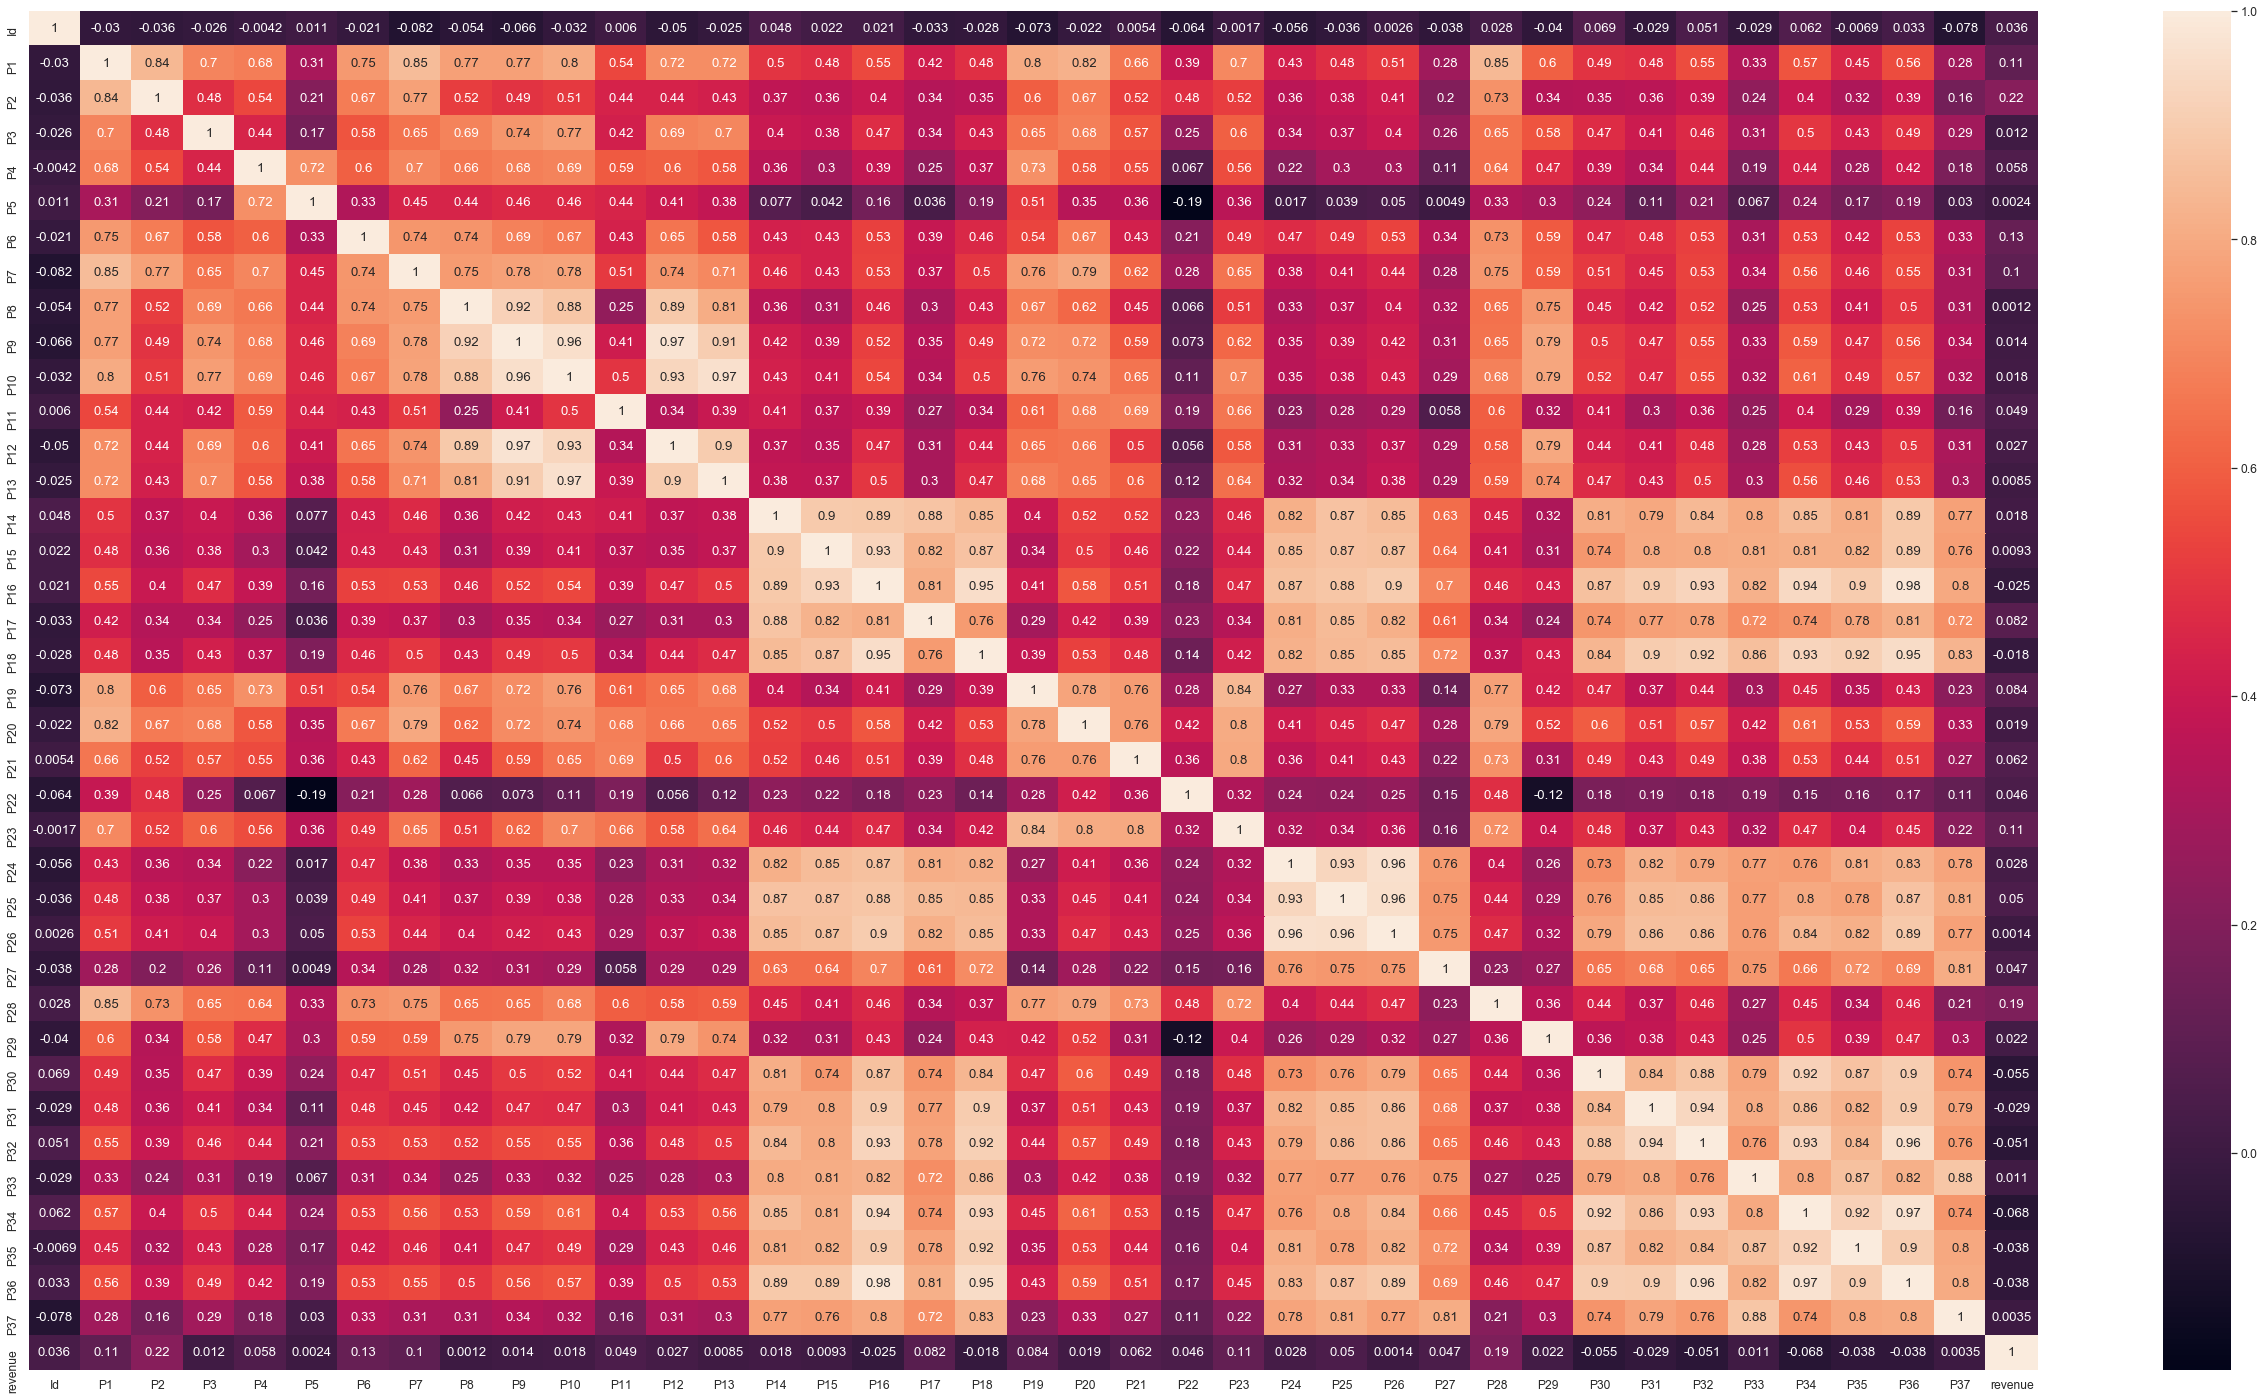

In [24]:
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True)

## Analyzing Relationships between the Categorical Variables and the target ['revenue']¶


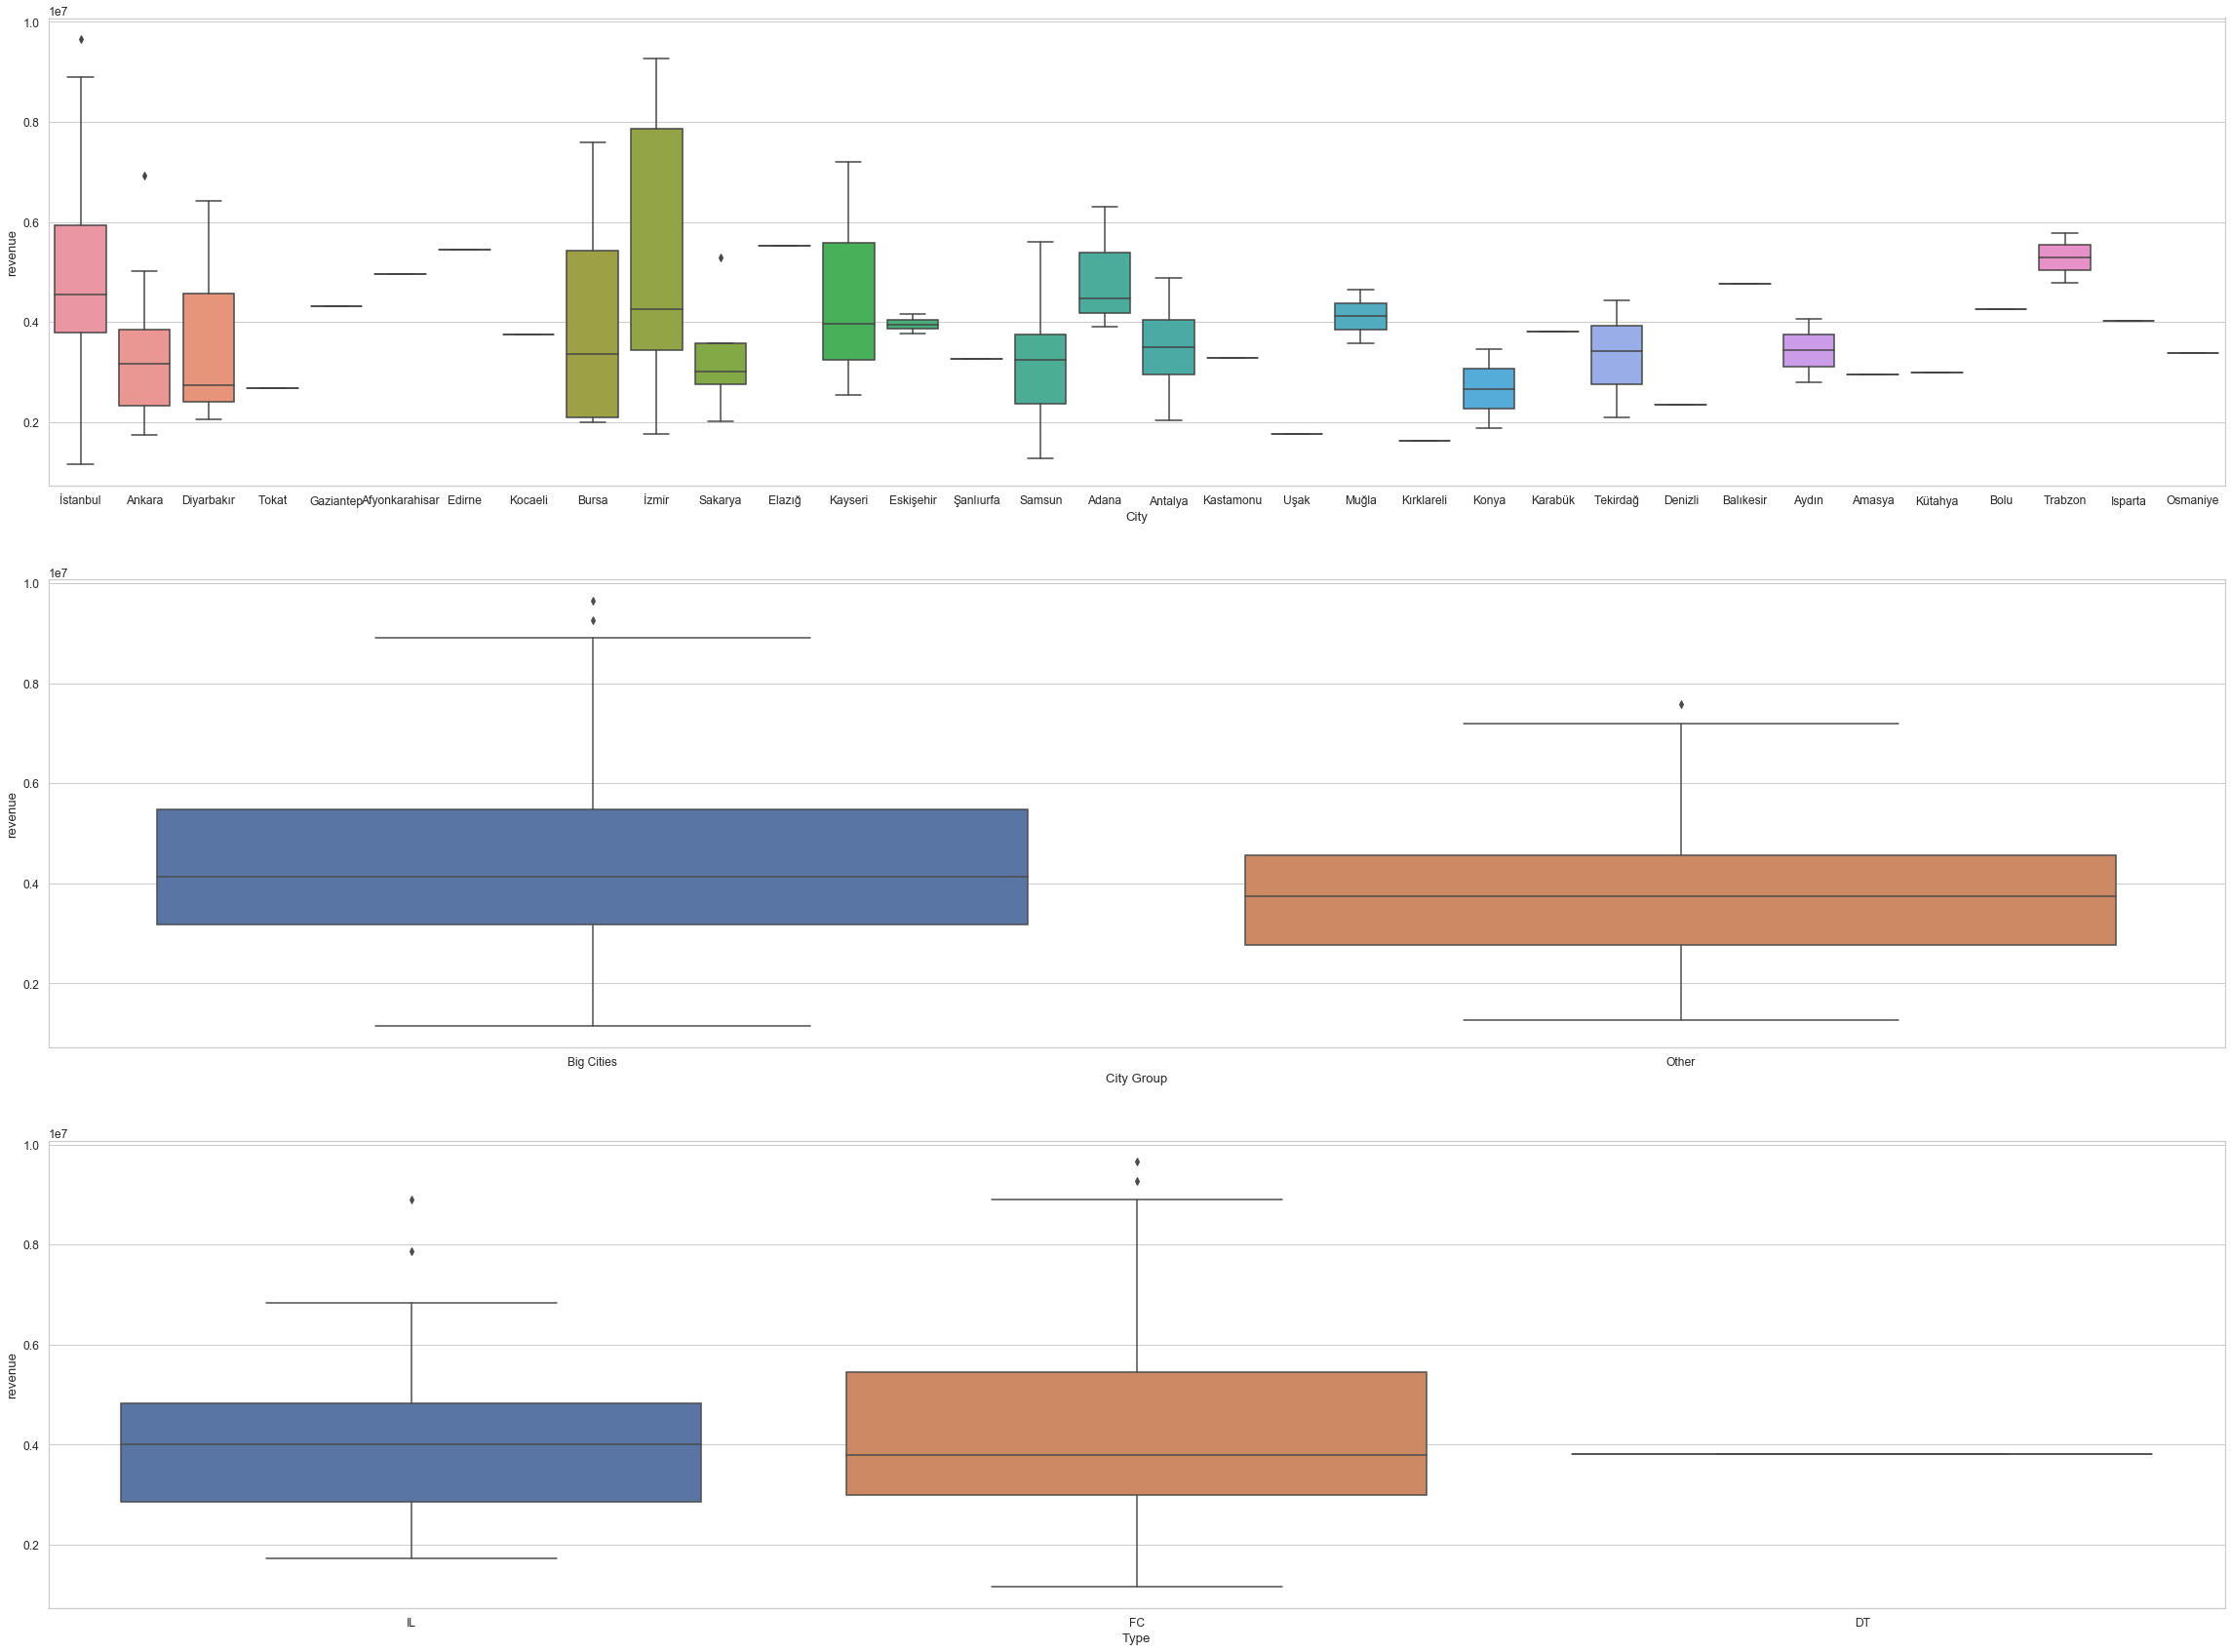

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=train, ax=subplot)

## Case Study : Analyzing Relationships between the Cities ['İstanbul','İzmir','Ankara','Bursa','Samsun'] feature and the target ['revenue'] with respect to Open_Date and the Type

In [26]:
cats = train["City"].unique()
cats

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

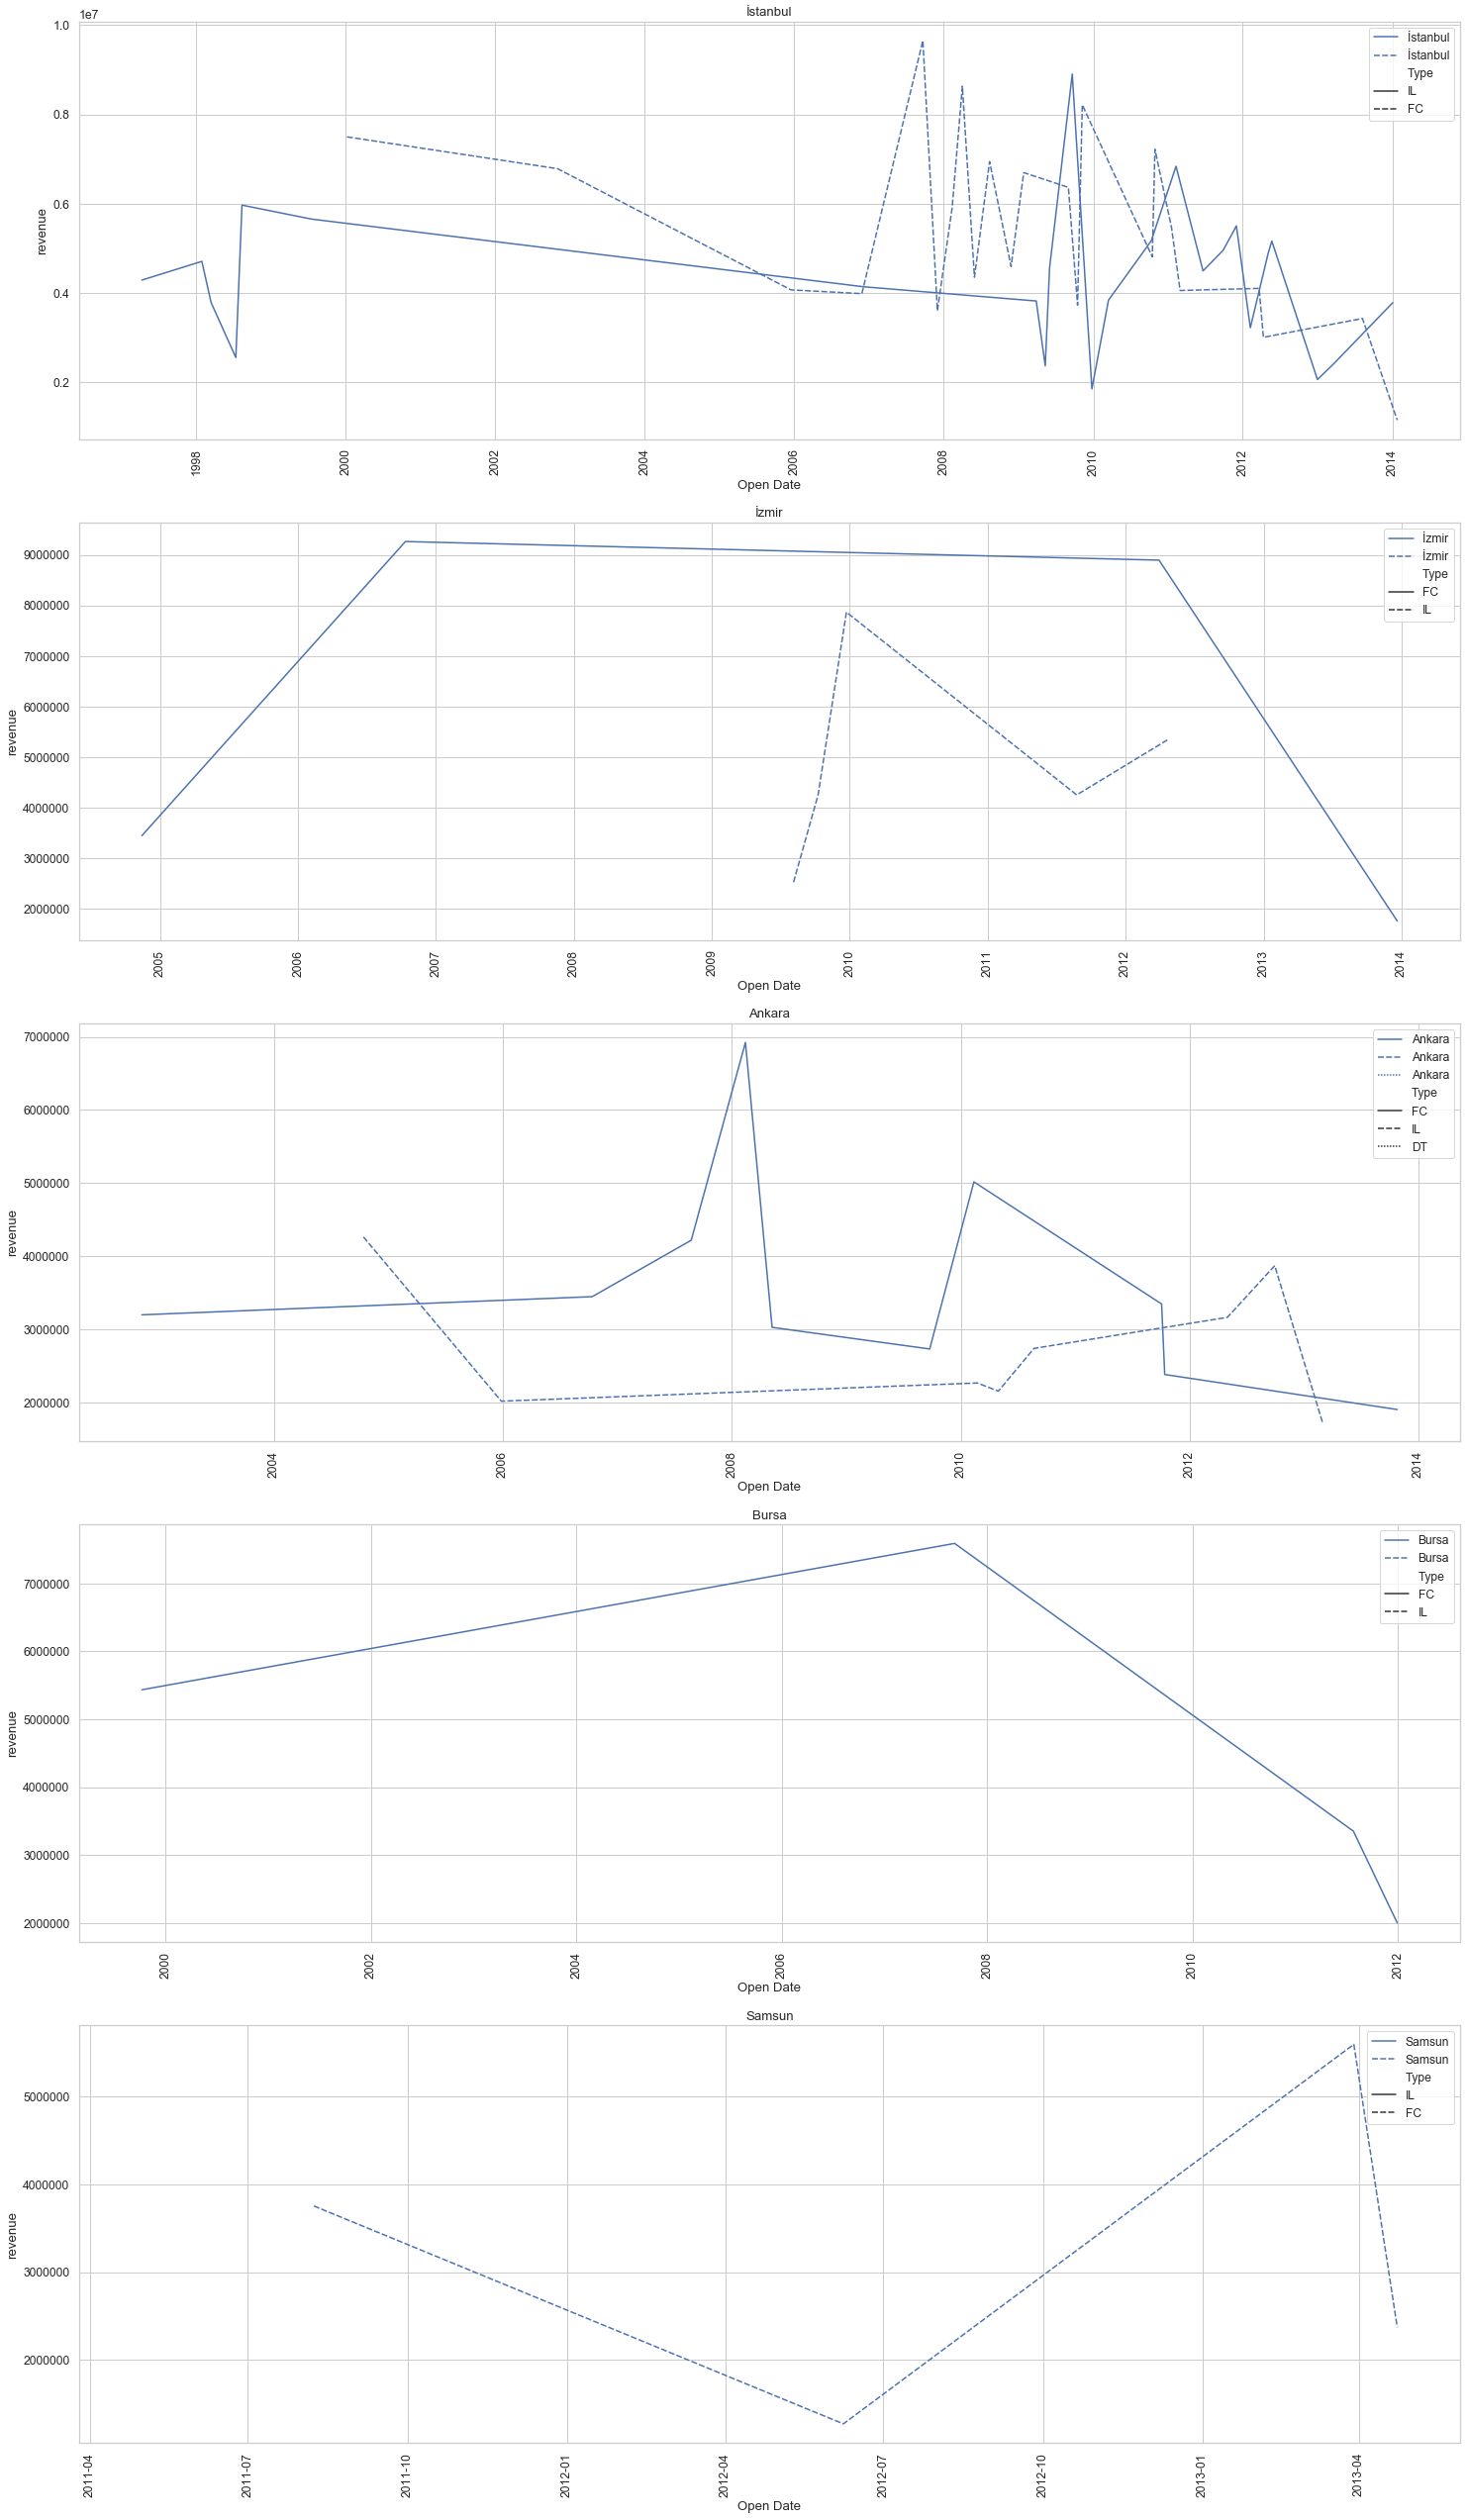

In [27]:
tem = train.copy()
#cats = train["City"].unique().tolist() 
#fig, ax = plt.subplots(34, 1, figsize=(25, 400))
cats = ['İstanbul','İzmir','Ankara','Bursa','Samsun']
fig, ax = plt.subplots(5, 1, figsize=(25, 45))
for variable, subplot in zip(cats, ax.flatten()):
    #x = tem.where(train["City"]==variable, inplace = False)
    x = tem[train["City"]==variable]
    x = x.sort_values(by=['Open Date'])
    if len(x) <= 4:        
        g = sns.barplot(x="Open Date", y="revenue",hue="Type", data=x, ax=subplot)
        g.title.set_text(variable)
    else:
        g = sns.lineplot(x="Open Date", y="revenue", style = "Type",label=variable, linestyle="-", data=x, ax=subplot)
        g.title.set_text(variable)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

## Data preprocessing

In [28]:
from sklearn import preprocessing

In [29]:
## as can be seen that test has more rows than the training dataset 
## as the viuslization clearly express no clear relation in the train
num_train = train.shape[0]
num_test = test.shape[0]
print(num_train, num_test)

# For feature engineering, combine train and test data
data = pd.concat((train.loc[:, "Id" : "P37"],
                  test.loc[:, "Id" : "P37"]), ignore_index=True)

134 100000


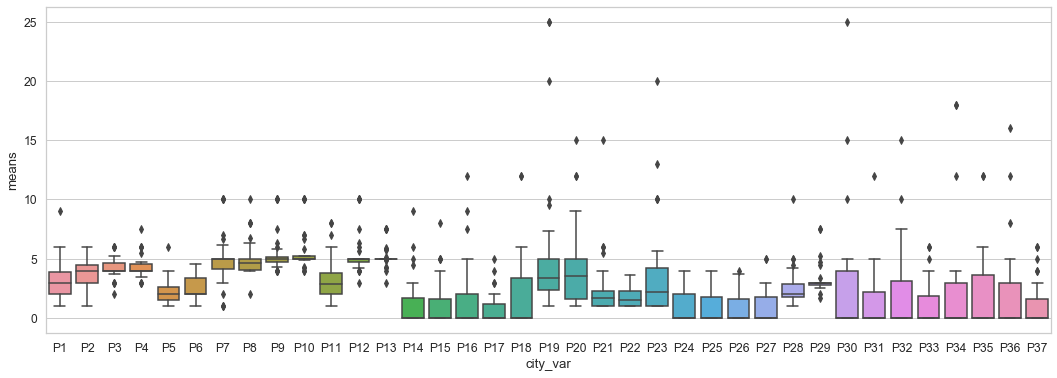

In [30]:
# Plotting mean of P-variables over each city helps us see which P-variables are highly related to City
# since we are given that one class of P-variables is geographical attributes.
distinct_cities = train.loc[:, "City"].unique()

# Get the mean of each p-variable for each city
means = []
for col in train.columns[5:42]:
    temp = []
    for city in distinct_cities:
        temp.append(train.loc[train.City == city, col].mean())     
    means.append(temp)
    
city_pvars = pd.DataFrame(columns=["city_var", "means"])
for i in range(37):
    for j in range(len(distinct_cities)):
        city_pvars.loc[i+37*j] = ["P"+str(i+1), means[i][j]]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
sns.boxplot(x="city_var", y="means", data=city_pvars)

In [31]:
from sklearn import cluster
def adjust_cities(data, train, k):
    
    # As found by box plot of each city's mean over each p-var
    relevant_pvars =  ["P1", "P2", "P11", "P19", "P20", "P23", "P30"]
    train = train.loc[:, relevant_pvars]
    
    # Optimal k is 20 as found by DB-Index plot    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(train)
    
    # Get the cluster centers and classify city of each data instance to one of the centers
    data['City Cluster'] = kmeans.predict(data.loc[:, relevant_pvars])
    del data["City"]
    
    return data

def one_hot_ecoding(data,col,pref):
    # One hot encode City Group
    data = data.join(pd.get_dummies(data[col], prefix=pref))
    # Since only n-1 columns are needed to binarize n categories, drop one of the new columns.  
    # And drop the original columns.
    data = data.drop([col], axis=1)
    return data 

In [32]:
data = adjust_cities(data, train, 20)
data = one_hot_ecoding(data,'City Group',"CG")
data = one_hot_ecoding(data,'Type',"T")

In [65]:
# Split into train and test datasets
train_processed = data[:num_train]
test_processed = data[num_train:]
# check the shapes 
print("Train :",train.shape)
print("Test:",test.shape)

Train : (134, 47)
Test: (100000, 46)


In [50]:
sav_train = pd.DataFrame()
sav_train["rev_save"] = train["revenue"].copy()

In [34]:
train["revenue"] = [np.log(num) for num in train["revenue"]]
len(train["revenue"])

134

In [35]:
train_processed["revenue"] = train["revenue"].values
train = train_processed
test = test_processed
print("Train :",train.shape)
print("Test:",test.shape)

Train : (134, 47)
Test: (100000, 46)


In [36]:
import time
from datetime import datetime as dt

## prepartion function 
def prepare_data_frame(dataframe, target):
    df = dataframe.copy()

    df['Open Date Year']  = df['Open Date'].dt.year
    df['Open Date Month']  = df['Open Date'].dt.month
    df['Open Date Day']  = df['Open Date'].dt.day
 
    all_diff = []
    for date in df["Open Date"]:
        diff = dt.now() - date
        all_diff.append(int(diff.days/1000))
    df['Days_from_open'] = pd.Series(all_diff)

    df = df.drop(['Open Date'], axis=1)
    # drop target column
    if target in df.columns:
        tar = df[target]
        df = df.drop([target], axis=1)
    else:
        tar = None

    return (df,tar)

In [37]:
X_train,y_train = prepare_data_frame(train,'revenue')
X_test,y_test = prepare_data_frame(test,'revenue')

In [64]:
import re

cols = [c for c in X_train.columns if not re.match('P\d+', c)]
X_train[cols]

Id  City Cluster  CG_Big Cities  CG_Other  T_DT  T_FC  T_IL  T_MB  \
0      0             5              1         0     0     0     1     0   
1      1            15              1         0     0     1     0     0   
2      2             4              0         1     0     0     1     0   
3      3             1              0         1     0     0     1     0   
4      4            13              0         1     0     0     1     0   
..   ...           ...            ...       ...   ...   ...   ...   ...   
129  132            14              0         1     0     1     0     0   
130  133             0              1         0     0     1     0     0   
131  134            15              0         1     0     1     0     0   
132  135            15              1         0     0     1     0     0   
133  136            15              1         0     0     1     0     0   

     Open Date Year  Open Date Month  Open Date Day  Days_from_open  
0              1999                7             17               7  
1              2008                2             14               4  
2              2013                3              9               2  
3              2012                2              2               2  
4              2009                5              9               3  
..              ...              ...            ...             ...  
129            2008                6             25               4  
130            2006               10             12               4  
131            2006                7              8               5  
132            2010               10             29               3  
133            2009                9              1               3  

[134 rows x 12 columns]

## Machine Learning

In [39]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

In [40]:
def get_reg_mse(model,in_parameters):
    my_model_1 = model
    clf = GridSearchCV(my_model_1, in_parameters, cv=2, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    print('best_params_',clf.best_params_)
    mae_1 = clf.best_score_ * -1
    return mae_1

In [41]:
def baseline_model():
    dim = len(X_train.columns.tolist())
    if not isinstance(dim, int):
        return 0
    model = tf.keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(int(round(dim/2)), kernel_initializer='normal', activation='relu'), ## 
        layers.Dense(int(round(dim/4)), kernel_initializer='normal', activation='relu'), ## 
        layers.Dense(int(round(dim/8)), kernel_initializer='normal', activation='relu'), ## 
        layers.Dense(1, kernel_initializer='normal')
    ])
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    return model

In [42]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

def get_reg_keras_mse(in_parameters):
    my_model_1 = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=baseline_model, verbose=1)
    reg = GridSearchCV(my_model_1, in_parameters, cv=2, scoring='neg_mean_squared_error')
    X_ktrain = StandardScaler().fit_transform(X_train.values)  
    arr = sav_train['rev_save'].values 
    y_ktrain = StandardScaler().fit_transform(arr[:, np.newaxis])
    
    reg.fit(X_ktrain, y_train.values)
    print('best_params_',reg.best_params_)
    mse_1 = reg.best_score_ * -1
    return mse_1

## Support Vector Regression

In [53]:
c = list(np.arange(1, 10, 1))
cache_size=list(range(100, 1001, 100))
parameters = {'kernel':('linear', 'rbf'), 'C':c,'cache_size':cache_size}
mse_1 = get_reg_mse(SVR(gamma='scale'),parameters)
print("Mean Squared Error:" , mse_1)

best_params_ {'C': 1, 'cache_size': 100, 'kernel': 'rbf'}
Mean Squared Error: 0.1874116681249376


## RandomForestRegressor

In [44]:
n_estimators=list(range(100, 501, 100))
max_depth = list(range(1, 5, 1))
parameters = {'n_estimators':n_estimators,'max_depth':max_depth}
mse_1 = get_reg_mse(RandomForestRegressor(random_state=400),parameters)
print("Mean Squared Error:" , mse_1)

best_params_ {'max_depth': 2, 'n_estimators': 100}
Mean Squared Error: 0.17199683733781734


## LassoCVRegressor

In [45]:
random_state=list(range(0, 100, 1))
parameters = {'random_state':random_state}
mse_1 = get_reg_mse(LassoCV(cv=2),parameters)
print("Mean Squared Error:" , mse_1)

best_params_ {'random_state': 0}
Mean Squared Error: 0.18914830294507762


## KerasRegressor (Neural Network)

In [66]:
seed = 1
epochs=list(range(100, 101, 100))
batch_size = [1,5]
parameters = {'epochs':epochs,'batch_size':batch_size}
mse_1 = get_reg_keras_mse(parameters)
print("Mean Squared Error:" , mse_1)

best_params_ {'batch_size': 1, 'epochs': 100}
Mean Squared Error: 4.583887828975833


## Revenue Prediction

In [92]:
X_test['Days_from_open'] = X_test['Days_from_open'].fillna(int(round(X_test['Days_from_open'].mean())))
reg = RandomForestRegressor(random_state=400, max_depth=2, n_estimators=100)
reg.fit(X_train, y_train)
pd.DataFrame(reg.predict(X_test), columns=['predicted_revenue'])

predicted_revenue
0              15.155711
1              15.101123
2              15.075595
3              15.047056
4              15.092850
...                  ...
99995          15.288346
99996          15.106341
99997          15.293878
99998          15.165404
99999          15.316379

[100000 rows x 1 columns]